AIT 664 - Hands on -II

Akhila Kudupudi
G01460711
AIT 664 DL3

In [7]:
import pandas as pd

# Loading the dataset
file_path = 'Boston-house-price-data.csv'
boston_data = pd.read_csv(file_path)

# Rename columns for clarity
boston_data.rename(columns={
    'CRIM': 'Crime_Rate',
    'ZN': 'Residential_Land_Zone',
    'INDUS': 'Non_Retail_Business_Acres',
    'CHAS': 'Charles_River_Proximity',
    'NOX': 'Nitric_Oxides_Concentration',
    'RM': 'Avg_Rooms_Per_Dwelling',
    'AGE': 'Owner_Occupied_Units_Built_Before_1940',
    'DIS': 'Distance_to_Employment_Centers',
    'RAD': 'Highway_Accessibility_Index',
    'TAX': 'Property_Tax_Rate',
    'PTRATIO': 'Pupil_Teacher_Ratio',
    'B': 'Proportion_of_Black_Population',
    'LSTAT': 'Lower_Status_Population_Percentage',
    'MEDV': 'Median_House_Value'
}, inplace=True)

# Displaying the dataset
boston_data.head()

,Crime_Rate,Residential_Land_Zone,Non_Retail_Business_Acres,Charles_River_Proximity,Nitric_Oxides_Concentration,Avg_Rooms_Per_Dwelling,Owner_Occupied_Units_Built_Before_1940,Distance_to_Employment_Centers,Highway_Accessibility_Index,Property_Tax_Rate,Pupil_Teacher_Ratio,Proportion_of_Black_Population,Lower_Status_Population_Percentage,Median_House_Value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Summary statistics of the dataset with renamed columns:
       Crime_Rate  Residential_Land_Zone  Non_Retail_Business_Acres  \
count  506.000000             506.000000                 506.000000   
mean     3.613524              11.363636                  11.136779   
std      8.601545              23.322453                   6.860353   
min      0.006320               0.000000                   0.460000   
25%      0.082045               0.000000                   5.190000   
50%      0.256510               0.000000                   9.690000   
75%      3.677083              12.500000                  18.100000   
max     88.976200             100.000000                  27.740000   

       Charles_River_Proximity  Nitric_Oxides_Concentration  \
count               506.000000                   506.000000   
mean                  0.069170                     0.554695   
std                   0.253994                     0.115878   
min                   0.000000                     0

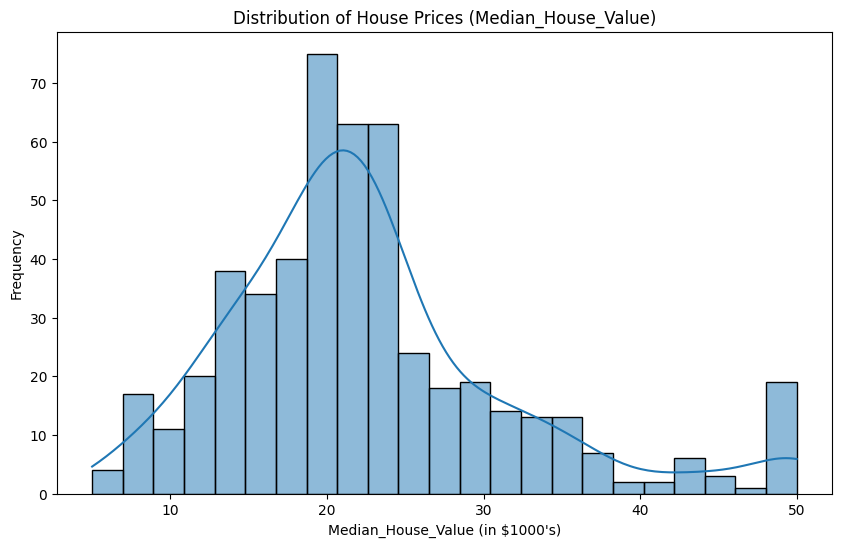

In [8]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans

# Summary statistics for the renamed columns
print("Summary statistics of the dataset with renamed columns:")
print(boston_data.describe())

# Check for missing values
print("Missing values in each column:")
print(boston_data.isnull().sum())



Summary Statistics shows count, mean, standard deviation, min, max, and quartiles for each column.

Crime_Rate has a high range (0.00632 to 88.9762), indicating
areas with drastically different crime rates.

Residential_Land_Zone has a median of 0, meaning that a large number of areas are not zoned for larger residential lots.

Charles_River_Proximity is a binary variable (0 or 1), with the mean around 0.07, indicating that only a small portion of properties are near the Charles River.

Median_House_Value ranges from $5,000 to $50,000 (scaled by $1,000).

There are not missing values in the provided data.

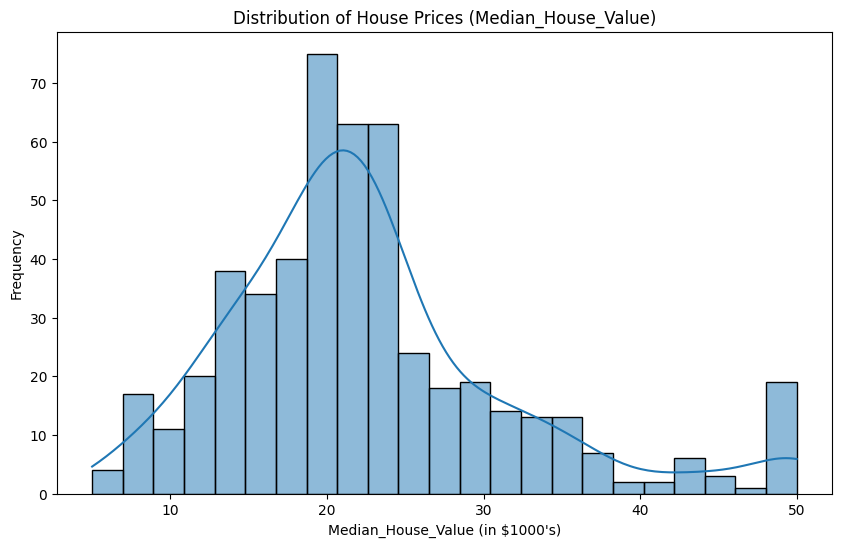

In [18]:
# Data visualization: Distribution of house prices (Median_House_Value)
plt.figure(figsize=(10, 6))
sns.histplot(boston_data['Median_House_Value'], kde=True)
plt.title("Distribution of House Prices (Median_House_Value)")
plt.xlabel("Median_House_Value (in $1000's)")
plt.ylabel("Frequency")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = boston_data.drop(columns=['Median_House_Value'])
y = boston_data['Median_House_Value']

# Split the data into training and testing datasets for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling for regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.linear_model import LinearRegression

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test_scaled)
print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lr))
print("R-Squared (R2 Score):", r2_score(y_test, y_pred_lr))


Linear Regression Metrics:
Mean Squared Error (MSE): 24.291119474973513
Mean Absolute Error (MAE): 3.189091965887848
R-Squared (R2 Score): 0.668759493535632


Mean Squared Error (MSE): 24.29 means on average, the square of the difference between predicted and actual values is 24.29. While it’s hard to say if this is good without comparison to other models, a lower MSE generally indicates better predictive performance.
Mean Absolute Error (MAE): 3.19 means on average, the predictions are off by about $3,190 from the actual house values (in $1,000's).
The model explains approximately 66.9% of the variance in the house prices. This is a moderate fit, indicating that the model captures some, but not all, of the relationship between the features and house prices.

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Regression Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("R-Squared (R2 Score):", r2_score(y_test, y_pred_rf))

Random Forest Regression Metrics:
Mean Squared Error (MSE): 7.912745333333333
Mean Absolute Error (MAE): 2.041078431372549
R-Squared (R2 Score): 0.8920995891343227


The MSE for Random Forest is significantly lower than that of the Linear Regression model (24.29), suggesting that Random Forest has improved predictive accuracy.
The MAE is also lower than that of Linear Regression (3.19), indicating that predictions are, on average, closer to the actual values.
The Random Forest model explains approximately 89.2% of the variance in house prices, which is substantially better than Linear Regression (66.9%). This high R² score indicates that the Random Forest model captures much more of the relationship between features and house prices.

In [13]:
# Categorize prices into two classes based on the median
median_price = boston_data['Median_House_Value'].median()
boston_data['Price_Category'] = (boston_data['Median_House_Value'] >= median_price).astype(int)

# Define features and target for classification
X_class = boston_data.drop(columns=['Median_House_Value', 'Price_Category'])
y_class = boston_data['Price_Category']

# Split the data into training and testing sets for classification
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_class_train_scaled = scaler.fit_transform(X_class_train)
X_class_test_scaled = scaler.transform(X_class_test)



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_class_train_scaled, y_class_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_class_test_scaled)
print("Logistic Regression Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_pred_log_reg))
print("Precision:", precision_score(y_class_test, y_pred_log_reg))
print("Recall:", recall_score(y_class_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_class_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_class_test, y_pred_log_reg))


Logistic Regression Classification Metrics:
Accuracy: 0.8725490196078431
Precision: 0.8297872340425532
Recall: 0.8863636363636364
F1 Score: 0.8571428571428571
Confusion Matrix:
 [[50  8]
 [ 5 39]]


The Logistic Regression model performs well, with high values for both precision and recall, indicating it is effective at correctly classifying house prices as above or below the median.


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_class_train_scaled, y_class_train)

# Predict and evaluate
y_pred_rf_clf = rf_clf.predict(X_class_test_scaled)
print("Random Forest Classification Metrics:")
print("Accuracy:", accuracy_score(y_class_test, y_pred_rf_clf))
print("Precision:", precision_score(y_class_test, y_pred_rf_clf))
print("Recall:", recall_score(y_class_test, y_pred_rf_clf))
print("F1 Score:", f1_score(y_class_test, y_pred_rf_clf))
print("Confusion Matrix:\n", confusion_matrix(y_class_test, y_pred_rf_clf))


Random Forest Classification Metrics:
Accuracy: 0.8725490196078431
Precision: 0.8297872340425532
Recall: 0.8863636363636364
F1 Score: 0.8571428571428571
Confusion Matrix:
 [[50  8]
 [ 5 39]]


The results for the Random Forest Classifier are quite similar to those of Logistic Regression, Both models perform similarly in overall accuracy.
 The Random Forest Classifier and Logistic Regression both show similar precision and recall values, indicating effective handling of the binary classification task.


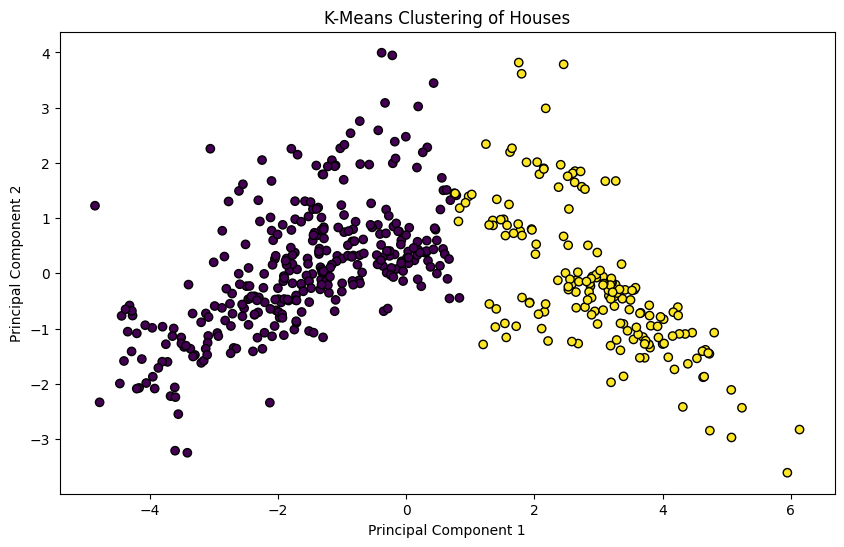

In [16]:
from sklearn.cluster import KMeans

# Scale the data
X_scaled = scaler.fit_transform(X)

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize clusters (using two principal components for simplicity)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title("K-Means Clustering of Houses")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
